In [2]:
# importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier


                                        ------EDA(Exploratory Data Analysis)-------

In [3]:
# Reading files from dataPreprocessing.py file
df=pd.read_csv('NursingHome.csv')
df.head()

<ipython-input-3-d66cf223f291>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('NursingHome.csv')


,Key,Year,Provider_CCN,Number_of_Beds,SNF_Admissions_Total,Total_Discharges_Total,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,...,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Wage_related_Costs_core,Total_Assets,Number Of Certified Beds,Provider Type,Overall Rating,Total Weighted Health Survey Score,Total Amount Of Fines In Dollars,Covid_Period
0,1,2015,15116,159.0,655.0,660.0,18373343.0,6089533.0,18373343.0,16449302.0,...,6485240.0,6485240.0,1076022.0,3396929.0,159.0,Medicare and Medicaid,2.0,52.667,0.0,Pre-COVID
1,2,2015,215147,155.0,411.0,411.0,10338336.0,1984780.0,10333308.0,9868736.0,...,3716118.0,4359538.0,908132.0,2857961.0,180.0,Medicare and Medicaid,5.0,24,0.0,Pre-COVID
2,3,2015,155378,138.0,175.0,175.0,15901315.0,4244311.0,15883148.0,13678161.0,...,4750966.0,5581483.0,896370.0,4606283.0,138.0,Medicare and Medicaid,1.0,104.667,0.0,Pre-COVID
3,4,2015,155242,185.0,335.0,326.0,22181551.0,4749030.0,22166276.0,16751562.0,...,5692676.0,6815899.0,1296223.0,5484722.0,185.0,Medicare and Medicaid,4.0,40,0.0,Pre-COVID
4,5,2015,155426,207.0,403.0,387.0,9443450.0,873374.0,9443450.0,7605673.0,...,2813656.0,3414136.0,452599.0,4726671.0,207.0,Medicare and Medicaid,3.0,37.333,0.0,Pre-COVID


In [525]:
# checking for null values
missing_values_count = df.isnull().sum()
missing_values_count

Key                                      0
Year                                     0
Provider_CCN                             0
Number_of_Beds                         321
SNF_Admissions_Total                   887
Total_Discharges_Total                 271
Gross_Revenue                          206
Inpatient_PPS_Amount                   118
Inpatient_Revenue                      207
Less_Total_Operating_Expense             2
Net_Income                             280
Net_Income_from_patients                 8
Net_Patient_Revenue                    202
Overhead_Non_Salary_Costs                0
Salaries_wages_and_fees_payable       9011
Total_Costs                             64
Total_General_Inpatient_Revenue        209
Total_Income                           230
Total_Salaries_From_Worksheet_A          1
Total_Salaries_adjusted                  1
Wage_related_Costs_core                608
Total_Assets                           699
Number Of Certified Beds              2948
Provider Ty

In [526]:
#finding what percentage of values in our dataset were missing to give us better
# sense of scale this problem
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

# the output is 1% indicates  the data set is empty

1.0356166485340474

In [527]:
df.shape

(102420, 28)

In [528]:
# Replace non-numeric values with NaN
df['Total Weighted Health Survey Score'] = pd.to_numeric(df['Total Weighted Health Survey Score'], errors='coerce')

# Convert column to float
df['Total Weighted Health Survey Score'] = df['Total Weighted Health Survey Score'].astype(np.float64)

In [529]:
data_type_numeric = df.select_dtypes(exclude='object').columns
data_type_numeric

Index(['Key', 'Year', 'Provider_CCN', 'Number_of_Beds', 'SNF_Admissions_Total',
       'Total_Discharges_Total', 'Gross_Revenue', 'Inpatient_PPS_Amount',
       'Inpatient_Revenue', 'Less_Total_Operating_Expense', 'Net_Income',
       'Net_Income_from_patients', 'Net_Patient_Revenue',
       'Overhead_Non_Salary_Costs', 'Salaries_wages_and_fees_payable',
       'Total_Costs', 'Total_General_Inpatient_Revenue', 'Total_Income',
       'Total_Salaries_From_Worksheet_A', 'Total_Salaries_adjusted',
       'Wage_related_Costs_core', 'Total_Assets', 'Number Of Certified Beds',
       'Overall Rating', 'Total Weighted Health Survey Score',
       'Total Amount Of Fines In Dollars'],
      dtype='object')

In [530]:
numerical_features=['Number_of_Beds', 'SNF_Admissions_Total',
       'Total_Discharges_Total', 'Gross_Revenue', 'Inpatient_PPS_Amount',
       'Inpatient_Revenue', 'Less_Total_Operating_Expense', 'Net_Income',
       'Net_Income_from_patients', 'Net_Patient_Revenue',
       'Overhead_Non_Salary_Costs', 'Salaries_wages_and_fees_payable',
       'Total_Costs', 'Total_General_Inpatient_Revenue', 'Total_Income',
       'Total_Salaries_From_Worksheet_A', 'Total_Salaries_adjusted',
       'Wage_related_Costs_core', 'Total_Assets', 'Number Of Certified Beds',
       'Overall Rating', 'Total Weighted Health Survey Score',
       'Total Amount Of Fines In Dollars']



In [531]:
df[numerical_features].shape

(102420, 23)

In [532]:
missing_values_count = df[numerical_features].isnull().sum()
missing_values_count

Number_of_Beds                         321
SNF_Admissions_Total                   887
Total_Discharges_Total                 271
Gross_Revenue                          206
Inpatient_PPS_Amount                   118
Inpatient_Revenue                      207
Less_Total_Operating_Expense             2
Net_Income                             280
Net_Income_from_patients                 8
Net_Patient_Revenue                    202
Overhead_Non_Salary_Costs                0
Salaries_wages_and_fees_payable       9011
Total_Costs                             64
Total_General_Inpatient_Revenue        209
Total_Income                           230
Total_Salaries_From_Worksheet_A          1
Total_Salaries_adjusted                  1
Wage_related_Costs_core                608
Total_Assets                           699
Number Of Certified Beds              2948
Overall Rating                        4350
Total Weighted Health Survey Score    3743
Total Amount Of Fines In Dollars      2948
dtype: int6

In [533]:
df['Number_of_Beds'].fillna(df['Number_of_Beds'].mean(), inplace=True)
df['SNF_Admissions_Total'].fillna(df['SNF_Admissions_Total'].mean(), inplace=True)
df['Total_Discharges_Total'].fillna(df['Total_Discharges_Total'].mean(), inplace=True)
df['Gross_Revenue'].fillna(df['Gross_Revenue'].mean(), inplace=True)
df['Inpatient_PPS_Amount'].fillna(df['Inpatient_PPS_Amount'].mean(), inplace=True)
df['Inpatient_Revenue'].fillna(df['Inpatient_Revenue'].mean(), inplace=True)
df['Less_Total_Operating_Expense'].fillna(df['Less_Total_Operating_Expense'].mean(), inplace=True)
df['Net_Income'].fillna(df['Net_Income'].mean(), inplace=True)
df['Net_Income_from_patients'].fillna(df['Net_Income_from_patients'].mean(), inplace=True)
df['Net_Patient_Revenue'].fillna(df['Net_Patient_Revenue'].mean(), inplace=True)
df['Overhead_Non_Salary_Costs'].fillna(df['Overhead_Non_Salary_Costs'].mean(), inplace=True)
df['Salaries_wages_and_fees_payable'].fillna(df['Salaries_wages_and_fees_payable'].mean(), inplace=True)
df['Total_Costs'].fillna(df['Total_Costs'].mean(), inplace=True)
df['Total_General_Inpatient_Revenue'].fillna(df['Total_General_Inpatient_Revenue'].mean(), inplace=True)
df['Total_Income'].fillna(df['Total_Income'].mean(), inplace=True)
df['Total_Salaries_From_Worksheet_A'].fillna(df['Total_Salaries_From_Worksheet_A'].mean(), inplace=True)
df['Total_Salaries_adjusted'].fillna(df['Total_Salaries_adjusted'].mean(), inplace=True)
df['Wage_related_Costs_core'].fillna(df['Wage_related_Costs_core'].mean(), inplace=True)
df['Total_Assets'].fillna(df['Total_Assets'].mean(), inplace=True)
df['Number Of Certified Beds'].fillna(df['Number Of Certified Beds'].mean(), inplace=True)
df['Total Amount Of Fines In Dollars'].fillna(df['Total Amount Of Fines In Dollars'].mean(), inplace=True)
df['Overall Rating'].fillna(df['Overall Rating'].mean(), inplace=True)
df['Total Weighted Health Survey Score'].fillna(df['Overall Rating'].mean(), inplace=True)

In [534]:
data_type_cateogrical=df.select_dtypes(include='object').columns
data_type_cateogrical

Index(['Provider Type', 'Covid_Period'], dtype='object')

In [535]:
df['Provider Type'].unique()

array(['Medicare and Medicaid', 'Medicare', nan], dtype=object)

In [537]:
missing_values_count = df[numerical_features].isnull().sum()
missing_values_count

Number_of_Beds                        0
SNF_Admissions_Total                  0
Total_Discharges_Total                0
Gross_Revenue                         0
Inpatient_PPS_Amount                  0
Inpatient_Revenue                     0
Less_Total_Operating_Expense          0
Net_Income                            0
Net_Income_from_patients              0
Net_Patient_Revenue                   0
Overhead_Non_Salary_Costs             0
Salaries_wages_and_fees_payable       0
Total_Costs                           0
Total_General_Inpatient_Revenue       0
Total_Income                          0
Total_Salaries_From_Worksheet_A       0
Total_Salaries_adjusted               0
Wage_related_Costs_core               0
Total_Assets                          0
Number Of Certified Beds              0
Overall Rating                        0
Total Weighted Health Survey Score    0
Total Amount Of Fines In Dollars      0
dtype: int64

In [538]:
# Check for null values in object dtype columns
null_values_object_dtype = df[df.select_dtypes(include=['object']).isnull().any(axis=1)]
null_values_object_dtype

,Key,Year,Provider_CCN,Number_of_Beds,SNF_Admissions_Total,Total_Discharges_Total,Gross_Revenue,Inpatient_PPS_Amount,Inpatient_Revenue,Less_Total_Operating_Expense,...,Total_Salaries_From_Worksheet_A,Total_Salaries_adjusted,Wage_related_Costs_core,Total_Assets,Number Of Certified Beds,Provider Type,Overall Rating,Total Weighted Health Survey Score,Total Amount Of Fines In Dollars,Covid_Period
183,184,2014,445140,120.0,50.0,54.0,15928635.0,5900028.0,15896802.0,10252478.0,...,3394735.0,4859633.0,570292.0,2308193.0,109.450901,NaN,3.160161,3.160161,16092.806191,Pre-COVID
318,323,2014,315516,139.0,59.0,22.0,8771030.0,3017841.0,8771030.0,7747583.0,...,2714312.0,2714312.0,380448.0,3097715.0,109.450901,NaN,3.160161,3.160161,16092.806191,Pre-COVID
526,537,2014,155361,64.0,14.0,27.0,7565578.0,2371570.0,7565578.0,5469407.0,...,2233894.0,2233894.0,465038.0,16145103.0,109.450901,NaN,3.160161,3.160161,16092.806191,Pre-COVID
627,650,2014,145371,117.0,15.0,66.0,4974010.0,357867.0,4974010.0,5093975.0,...,2373634.0,2373634.0,282699.0,2190214.0,109.450901,NaN,3.160161,3.160161,16092.806191,Pre-COVID
629,652,2014,145992,60.0,70.0,70.0,2581494.0,380362.0,2581494.0,2341004.0,...,1061432.0,1061432.0,115926.0,1765122.0,109.450901,NaN,3.160161,3.160161,16092.806191,Pre-COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102311,106160,2022,205054,114.0,145.0,138.0,14625585.0,3767614.0,14625585.0,10695212.0,...,4267253.0,4197715.0,405910.0,11381974.0,109.450901,NaN,3.160161,3.160161,16092.806191,Post-COVID
102329,106178,2022,165017,105.0,325.0,357.0,4371521.0,700331.0,3951384.0,4065942.0,...,1636856.0,1636856.0,194693.0,2951951.0,109.450901,NaN,3.160161,3.160161,16092.806191,Post-COVID
102359,106208,2022,146091,130.0,220.0,220.0,13153831.0,2580950.0,13153831.0,11155458.0,...,4194575.0,4194575.0,833161.0,5521311.0,109.450901,NaN,3.160161,3.160161,16092.806191,Post-COVID
102397,106246,2022,115537,148.0,342.0,297.0,16526838.0,1608488.0,16054167.0,12736844.0,...,5278331.0,5278331.0,1018178.0,10387991.0,109.450901,NaN,3.160161,3.160161,16092.806191,Post-COVID


In [539]:
df_cleaned = df.dropna(subset=df.select_dtypes(include=['object']).columns)
#df_cleaned

In [540]:
missing_values_count = df_cleaned.isnull().sum()
missing_values_count

Key                                   0
Year                                  0
Provider_CCN                          0
Number_of_Beds                        0
SNF_Admissions_Total                  0
Total_Discharges_Total                0
Gross_Revenue                         0
Inpatient_PPS_Amount                  0
Inpatient_Revenue                     0
Less_Total_Operating_Expense          0
Net_Income                            0
Net_Income_from_patients              0
Net_Patient_Revenue                   0
Overhead_Non_Salary_Costs             0
Salaries_wages_and_fees_payable       0
Total_Costs                           0
Total_General_Inpatient_Revenue       0
Total_Income                          0
Total_Salaries_From_Worksheet_A       0
Total_Salaries_adjusted               0
Wage_related_Costs_core               0
Total_Assets                          0
Number Of Certified Beds              0
Provider Type                         0
Overall Rating                        0


In [541]:
df_cleaned['Provider Type'].value_counts()

Provider Type
Medicare and Medicaid    95761
Medicare                  3711
Name: count, dtype: int64

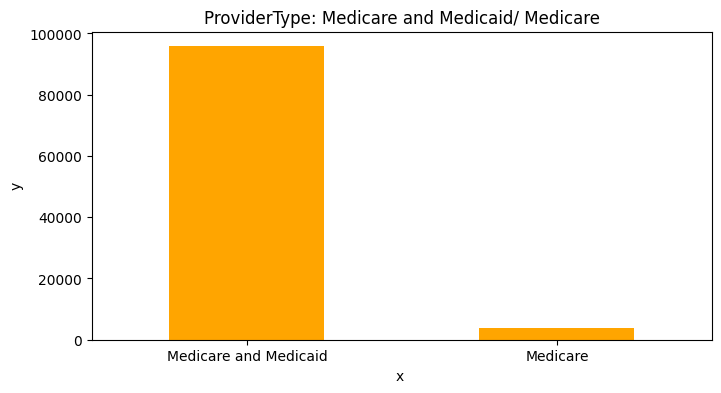

In [542]:
ProviderType=df_cleaned['Provider Type'].value_counts() # storing the value
plt.figure(figsize=(8,4))
ProviderType.plot(kind='bar',color='orange')
plt.title('ProviderType: Medicare and Medicaid/ Medicare')

plt.xlabel('x ')
plt.ylabel('y')
plt.xticks(rotation=0)

plt.show()

In [ ]:
# Replace values in the 'provider_type' column
#df_cleaned['Provider Type'] = df_cleaned['Provider Type'].replace({'Medicare and Medicaid': 0, 'Medicare': 1})

In [543]:
df_cleaned['Covid_Period'] = df_cleaned['Covid_Period'].replace({'Pre-COVID': 0, 'Post-COVID': 1})

<ipython-input-543-107c5ffd6804>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Covid_Period'] = df_cleaned['Covid_Period'].replace({'Pre-COVID': 0, 'Post-COVID': 1})


In [544]:
# checking for null values
missing_values_count = df_cleaned.isnull().sum()
missing_values_count

Key                                   0
Year                                  0
Provider_CCN                          0
Number_of_Beds                        0
SNF_Admissions_Total                  0
Total_Discharges_Total                0
Gross_Revenue                         0
Inpatient_PPS_Amount                  0
Inpatient_Revenue                     0
Less_Total_Operating_Expense          0
Net_Income                            0
Net_Income_from_patients              0
Net_Patient_Revenue                   0
Overhead_Non_Salary_Costs             0
Salaries_wages_and_fees_payable       0
Total_Costs                           0
Total_General_Inpatient_Revenue       0
Total_Income                          0
Total_Salaries_From_Worksheet_A       0
Total_Salaries_adjusted               0
Wage_related_Costs_core               0
Total_Assets                          0
Number Of Certified Beds              0
Provider Type                         0
Overall Rating                        0


In [545]:
#finding what percentage of values in our dataset were missing to give us better
# sense of scale this problem
total_cells = np.product(df_cleaned.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

# the output is indicates  the data set is empty

0.0

In [548]:
includeobjectFeature= df_cleaned.select_dtypes(include='object').columns
includeobjectFeature

Index(['Provider Type'], dtype='object')

In [549]:
exclude_objectfeature = df_cleaned.select_dtypes(exclude='object').columns
exclude_objectfeature

Index(['Key', 'Year', 'Provider_CCN', 'Number_of_Beds', 'SNF_Admissions_Total',
       'Total_Discharges_Total', 'Gross_Revenue', 'Inpatient_PPS_Amount',
       'Inpatient_Revenue', 'Less_Total_Operating_Expense', 'Net_Income',
       'Net_Income_from_patients', 'Net_Patient_Revenue',
       'Overhead_Non_Salary_Costs', 'Salaries_wages_and_fees_payable',
       'Total_Costs', 'Total_General_Inpatient_Revenue', 'Total_Income',
       'Total_Salaries_From_Worksheet_A', 'Total_Salaries_adjusted',
       'Wage_related_Costs_core', 'Total_Assets', 'Number Of Certified Beds',
       'Overall Rating', 'Total Weighted Health Survey Score',
       'Total Amount Of Fines In Dollars', 'Covid_Period'],
      dtype='object')

In [556]:
numericalFeature=['Number_of_Beds', 'SNF_Admissions_Total',
       'Total_Discharges_Total', 'Gross_Revenue', 'Inpatient_PPS_Amount',
       'Inpatient_Revenue', 'Less_Total_Operating_Expense', 'Net_Income',
       'Net_Income_from_patients', 'Net_Patient_Revenue',
       'Overhead_Non_Salary_Costs', 'Salaries_wages_and_fees_payable',
       'Total_Costs', 'Total_General_Inpatient_Revenue', 'Total_Income',
       'Total_Salaries_From_Worksheet_A', 'Total_Salaries_adjusted',
       'Wage_related_Costs_core', 'Total_Assets', 'Number Of Certified Beds',
       'Overall Rating', 'Total Weighted Health Survey Score',
       'Total Amount Of Fines In Dollars','Covid_Period']

In [557]:
# finding number of negative values in column
negative_values_count = (df_cleaned[numericalFeature] < 0).sum()
negative_values_count
# fetching rows which has negative values
#float_columns = df.select_dtypes(include=['float']).columns
#float_columns = df[numerical_features]
#rows_with_negative_values = (df['Total_Assets'] < 0)
#rows_with_negative_values

Number_of_Beds                            0
SNF_Admissions_Total                      0
Total_Discharges_Total                    0
Gross_Revenue                             7
Inpatient_PPS_Amount                      0
Inpatient_Revenue                         7
Less_Total_Operating_Expense              0
Net_Income                            44708
Net_Income_from_patients              60424
Net_Patient_Revenue                      19
Overhead_Non_Salary_Costs                 0
Salaries_wages_and_fees_payable         994
Total_Costs                               0
Total_General_Inpatient_Revenue           2
Total_Income                          43964
Total_Salaries_From_Worksheet_A           0
Total_Salaries_adjusted                   0
Wage_related_Costs_core                   5
Total_Assets                           3355
Number Of Certified Beds                  0
Overall Rating                            0
Total Weighted Health Survey Score        0
Total Amount Of Fines In Dollars

In [558]:
df_cleaned.shape

(99472, 28)

In [577]:
# Calculate the maximum number of negative values allowed in each row
threshold = 0.125  # 30% threshold
max_negative_values = (len(df_cleaned[numericalFeature].columns) * threshold)

# Filter the DataFrame based on the condition
new_df = df_cleaned[numericalFeature][(df_cleaned[numericalFeature] < 0).sum(axis=1) <= max_negative_values]


In [578]:
new_df.shape

(96368, 24)

In [579]:
new_df.columns

Index(['Number_of_Beds', 'SNF_Admissions_Total', 'Total_Discharges_Total',
       'Gross_Revenue', 'Inpatient_PPS_Amount', 'Inpatient_Revenue',
       'Less_Total_Operating_Expense', 'Net_Income',
       'Net_Income_from_patients', 'Net_Patient_Revenue',
       'Overhead_Non_Salary_Costs', 'Salaries_wages_and_fees_payable',
       'Total_Costs', 'Total_General_Inpatient_Revenue', 'Total_Income',
       'Total_Salaries_From_Worksheet_A', 'Total_Salaries_adjusted',
       'Wage_related_Costs_core', 'Total_Assets', 'Number Of Certified Beds',
       'Overall Rating', 'Total Weighted Health Survey Score',
       'Total Amount Of Fines In Dollars', 'Covid_Period'],
      dtype='object')

In [272]:
# shifting data on positive axis:

#df_shifted= df_cleaned[numericalFeature].abs()
# shifting entire data to postive distribution
#min_value= df_cleaned[numericalFeature].min()
# making data postive values
# Shift by the minimum value and add 1 to ensure positivity
#new_df= df_shifted- min_value+1

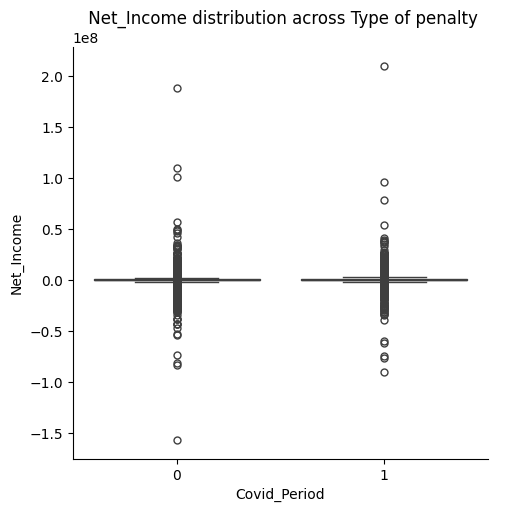

In [580]:
# lets check for outliers

#detecting outlier
sns.catplot(data=new_df,x='Covid_Period',y='Net_Income', kind = 'box')
plt.title(' Net_Income distribution across Type of penalty')
plt.show()

In [581]:
# Performing winzorisation
#from scipy.stats.mstats import winsorize
#winsorized_values = winsorize(new_df, limits=[0.06, 0.06])

#Replace original column 'A' with winsorized values---
#new_df = winsorized_values

from scipy.stats.mstats import winsorize

# Define limits for winsorization
lower_limit = 0.02
upper_limit = 0.02

# Iterate over each column and winsorize
for col in new_df.columns:
    winsorized_values = winsorize(new_df[col], limits=[lower_limit, upper_limit])
    new_df[col] = winsorized_values


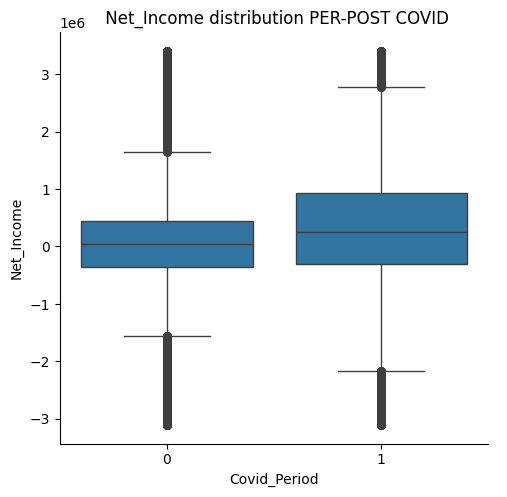

In [582]:
# checking outliers
sns.catplot(data=new_df,x='Covid_Period',y='Net_Income', kind = 'box')
plt.title(' Net_Income distribution PER-POST COVID')
plt.show()

In [583]:
new_df.shape # this data frame has numerical data excluding key, ccn,year and object data type

(96368, 24)

In [ ]:
# Drop rows with negative values in any column
#new_df = df_cleaned[(df_cleaned >= 0).all(axis=1)]

In [585]:
# checking for negative values again:
negative_values_count = (new_df < 0).sum()
negative_values_count

Number_of_Beds                            0
SNF_Admissions_Total                      0
Total_Discharges_Total                    0
Gross_Revenue                             0
Inpatient_PPS_Amount                      0
Inpatient_Revenue                         0
Less_Total_Operating_Expense              0
Net_Income                            41612
Net_Income_from_patients              57320
Net_Patient_Revenue                       0
Overhead_Non_Salary_Costs                 0
Salaries_wages_and_fees_payable           0
Total_Costs                               0
Total_General_Inpatient_Revenue           0
Total_Income                          40860
Total_Salaries_From_Worksheet_A           0
Total_Salaries_adjusted                   0
Wage_related_Costs_core                   0
Total_Assets                              0
Number Of Certified Beds                  0
Overall Rating                            0
Total Weighted Health Survey Score        0
Total Amount Of Fines In Dollars

In [586]:
# checking for null values in NEW DATA FRAME
missing_values_count = new_df.isnull().sum()
missing_values_count

Number_of_Beds                        0
SNF_Admissions_Total                  0
Total_Discharges_Total                0
Gross_Revenue                         0
Inpatient_PPS_Amount                  0
Inpatient_Revenue                     0
Less_Total_Operating_Expense          0
Net_Income                            0
Net_Income_from_patients              0
Net_Patient_Revenue                   0
Overhead_Non_Salary_Costs             0
Salaries_wages_and_fees_payable       0
Total_Costs                           0
Total_General_Inpatient_Revenue       0
Total_Income                          0
Total_Salaries_From_Worksheet_A       0
Total_Salaries_adjusted               0
Wage_related_Costs_core               0
Total_Assets                          0
Number Of Certified Beds              0
Overall Rating                        0
Total Weighted Health Survey Score    0
Total Amount Of Fines In Dollars      0
Covid_Period                          0
dtype: int64

In [587]:
# checking for negative count in new DataFrame
negative_values_count = (new_df < 0).sum()
negative_values_count

Number_of_Beds                            0
SNF_Admissions_Total                      0
Total_Discharges_Total                    0
Gross_Revenue                             0
Inpatient_PPS_Amount                      0
Inpatient_Revenue                         0
Less_Total_Operating_Expense              0
Net_Income                            41612
Net_Income_from_patients              57320
Net_Patient_Revenue                       0
Overhead_Non_Salary_Costs                 0
Salaries_wages_and_fees_payable           0
Total_Costs                               0
Total_General_Inpatient_Revenue           0
Total_Income                          40860
Total_Salaries_From_Worksheet_A           0
Total_Salaries_adjusted                   0
Wage_related_Costs_core                   0
Total_Assets                              0
Number Of Certified Beds                  0
Overall Rating                            0
Total Weighted Health Survey Score        0
Total Amount Of Fines In Dollars

In [588]:
correlationmatrix= new_df.corr()

In [589]:
# Set the threshold for high correlation
threshold = 0.90  # Adjust as needed

# Find highly correlated pairs of columns
highly_correlated_pairs = []

# Iterate over the correlation matrix
for i in range(len(correlationmatrix.columns)):
    for j in range(i+1, len(correlationmatrix.columns)):
        if abs(correlationmatrix.iloc[i, j]) > threshold:
            # If correlation coefficient is above threshold, add the pair to the list
            highly_correlated_pairs.append((correlationmatrix.columns[i], correlationmatrix.columns[j]))

highly_correlated_pairs

[('SNF_Admissions_Total', 'Total_Discharges_Total'),
 ('Gross_Revenue', 'Inpatient_Revenue'),
 ('Gross_Revenue', 'Net_Patient_Revenue'),
 ('Gross_Revenue', 'Total_General_Inpatient_Revenue'),
 ('Inpatient_Revenue', 'Net_Patient_Revenue'),
 ('Inpatient_Revenue', 'Total_General_Inpatient_Revenue'),
 ('Less_Total_Operating_Expense', 'Net_Patient_Revenue'),
 ('Less_Total_Operating_Expense', 'Overhead_Non_Salary_Costs'),
 ('Less_Total_Operating_Expense', 'Total_Salaries_From_Worksheet_A'),
 ('Less_Total_Operating_Expense', 'Total_Salaries_adjusted'),
 ('Net_Income', 'Total_Income'),
 ('Total_Salaries_From_Worksheet_A', 'Total_Salaries_adjusted')]

In [590]:
 # Drop redundant columns
columns_to_drop = ['Total_Salaries_From_Worksheet_A', 'Inpatient_Revenue', 'Less_Total_Operating_Expense']
#columns_to_drop = ['Overall Rating', 'Total Weighted Health Survey Score']
new_df.drop(columns=columns_to_drop, inplace=True)

In [591]:
new_df.shape

(96368, 21)

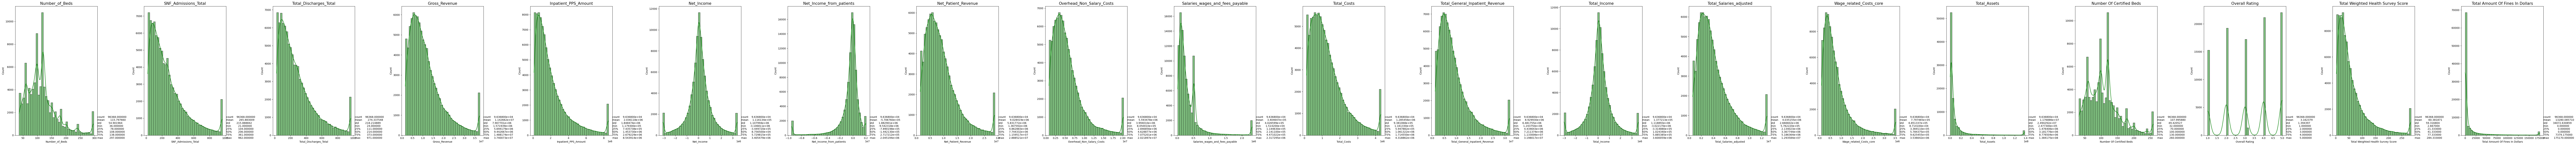

In [592]:
def desc_num_feature(columns=None, bins=40, edgecolor='k', figsize=(7,8), **kwargs):
    if columns is None:
        raise ValueError("Please provide one or more columns.")

    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(figsize[0]*num_columns, figsize[1]))

    for i, column in enumerate(columns):
        ax = axes[i] if num_columns > 1 else axes
        sns.histplot(new_df[column], bins=bins, kde=True, color='green', edgecolor=edgecolor, ax=ax, **kwargs)
        ax.set_title(column, size=15)
        desc_text = new_df[column].describe().to_string()
        ax.text(1, 0.15, desc_text, size=10, transform=ax.transAxes, verticalalignment='top')

    plt.tight_layout()

# Example usage
desc_num_feature(columns=['Number_of_Beds', 'SNF_Admissions_Total', 'Total_Discharges_Total', 'Gross_Revenue', 'Inpatient_PPS_Amount', 'Net_Income', 'Net_Income_from_patients', 'Net_Patient_Revenue', 'Overhead_Non_Salary_Costs', 'Salaries_wages_and_fees_payable', 'Total_Costs', 'Total_General_Inpatient_Revenue', 'Total_Income', 'Total_Salaries_adjusted',
                          'Wage_related_Costs_core', 'Total_Assets', 'Number Of Certified Beds', 'Overall Rating', 'Total Weighted Health Survey Score',
                          'Total Amount Of Fines In Dollars']
)
plt.show()

In [593]:
# Performing data transformation bcoz its right skewed and has no 0 as values
columns_to_transform = ['Inpatient_PPS_Amount','Net_Patient_Revenue','Overhead_Non_Salary_Costs','Total_Costs','Total_General_Inpatient_Revenue',
                        'Wage_related_Costs_core','Total_Salaries_adjusted','Total Weighted Health Survey Score',]
#'Net_Patient_Revenue'Total_General_Inpatient_Revenue
# Apply log transformation to selected columns
transformed_data = new_df[columns_to_transform].apply(lambda x: np.log(x))

# Concatenate transformed data with the original DataFrame
df_transformed  = pd.concat([new_df.drop(columns=columns_to_transform), transformed_data], axis=1)

# Print the transformed DataFrame
#print(df_transformed)

In [594]:
df_transformed.columns

Index(['Number_of_Beds', 'SNF_Admissions_Total', 'Total_Discharges_Total',
       'Gross_Revenue', 'Net_Income', 'Net_Income_from_patients',
       'Salaries_wages_and_fees_payable', 'Total_Income', 'Total_Assets',
       'Number Of Certified Beds', 'Overall Rating',
       'Total Amount Of Fines In Dollars', 'Covid_Period',
       'Inpatient_PPS_Amount', 'Net_Patient_Revenue',
       'Overhead_Non_Salary_Costs', 'Total_Costs',
       'Total_General_Inpatient_Revenue', 'Wage_related_Costs_core',
       'Total_Salaries_adjusted', 'Total Weighted Health Survey Score'],
      dtype='object')

In [506]:
numeric=['Number_of_Beds', 'SNF_Admissions_Total',
       'Total_Discharges_Total', 'Gross_Revenue', 'Inpatient_PPS_Amount',
       'Net_Income', 'Net_Income_from_patients', 'Net_Patient_Revenue',
       'Overhead_Non_Salary_Costs', 'Salaries_wages_and_fees_payable',
       'Total_Costs', 'Total_General_Inpatient_Revenue', 'Total_Income',
       'Total_Salaries_adjusted', 'Wage_related_Costs_core', 'Total_Assets',
       'Number Of Certified Beds', 'Overall Rating',
       'Total Weighted Health Survey Score',
       'Total Amount Of Fines In Dollars']

                ------ 2)  FEATURE SELECTION --------------

In [643]:
X = new_df.drop(['Net_Income'], axis=1)
y = new_df['Net_Income']

In [644]:
# splitting data set into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

                 -------------DIMENSIONAL REDUCTION USING PCA -------------------

               PERFORMING SCALING AND CENTERING

In [645]:
# 1. Import the class you will use
from sklearn.preprocessing import StandardScaler
# 2. Create an instance of the class
scaler = StandardScaler()
# 3. Use the fit method of the instance
scaler.fit(X_train)
# 4. Use the transform method to perform the transformation
X_train.loc[:] = scaler.transform(X_train)

In [646]:
X_train.columns

Index(['Number_of_Beds', 'SNF_Admissions_Total', 'Total_Discharges_Total',
       'Gross_Revenue', 'Inpatient_PPS_Amount', 'Net_Income_from_patients',
       'Net_Patient_Revenue', 'Overhead_Non_Salary_Costs',
       'Salaries_wages_and_fees_payable', 'Total_Costs',
       'Total_General_Inpatient_Revenue', 'Total_Income',
       'Total_Salaries_adjusted', 'Wage_related_Costs_core', 'Total_Assets',
       'Number Of Certified Beds', 'Overall Rating',
       'Total Weighted Health Survey Score',
       'Total Amount Of Fines In Dollars', 'Covid_Period'],
      dtype='object')

In [647]:
X_train.shape

(86731, 20)

In [648]:
# scaling on test data
X_test.loc[:] =scaler.transform(X_test)


                       3)  MODEL BUILDING

In [649]:
# 1. Import the Estimator class you will use
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the class
ml_reg = LinearRegression()
# 3. Use the fit method of the instance
ml_reg.fit(X_train, y_train)
# 4. Use the predict method to get the predictions
y_pred_ml_reg = ml_reg.predict(X_train)

In [650]:
# re-training the model with all features again.
ml_reg.fit(X_train, y_train)

LinearRegression()

In [651]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_ml_reg)
mse_ml_reg = mean_squared_error(y_true=y_train, y_pred=y_pred_ml_reg)
mse = mse_ml_reg / 1e6

print('THE MSE IS :{:.3f} M'.format(mse),'and R2 is FOR MLR :',r2)

THE MSE IS :66289.640 M and R2 is FOR MLR : 0.9458434210892129


122.404M


In [652]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_train)

In [655]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_lasso)
mse_lasso = mean_squared_error(y_true=y_train, y_pred=y_pred_lasso)
mse_lasso=mse_lasso / 1e10
print('THE MSE FOR LASSO {:.3f}M'.format( mse_lasso),'THE R2 IS:',  r2)

THE MSE FOR LASSO 6.629M THE R2 IS: 0.9458434208983321


In [656]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_train)


In [657]:
mse_ridge = mean_squared_error(y_true=y_train, y_pred=y_pred_ridge)
mse_mse_ridge=mse_ridge / 1e9
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_ridge)
# Print the MSE value without scientific notation and with two decimal places

print('THE MSE FOR RIDGE {:.3f}M'.format( mse_mse_ridge),'THE R2 IS:',  r2)

THE MSE FOR RIDGE 66.290M THE R2 IS: 0.9458434034215306


In [659]:

 # performing RANDOM FOREST REGTRESSION
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=123)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)


In [660]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
mse_RF = mean_squared_error(y_test, y_pred)
print('MSE FOR RFR{:.3f}M :', mse_RF,'THE R2 is :',r2)


MSE FOR RFR{:.3f}M : 43392092457.24129 THE R2 is : 0.9652783323886159


In [661]:
# 1. Import the Estimator class you will use
from sklearn.neighbors import KNeighborsRegressor
# 2. Create an instance of the class
knn = KNeighborsRegressor(n_neighbors=10)
# 3. Use the fit method of the instance
knn.fit(X_train, y_train)
# 4. Use the predict method to get the predictions
y_pred_knn = knn.predict(X_train)


In [665]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_knn)
mse_knn = mean_squared_error(y_true=y_train, y_pred=y_pred_knn)
print('MSE FOR KNN{:.3f}M '.format(mse_knn/1e9),'THE R2 is :',r2)


MSE FOR KNN208.178M  THE R2 is : 0.8296578618572408


In [666]:
y_pred_null_model = np.full(y_train.shape, y_train.mean())
mse_null_model = mean_squared_error(y_true=y_train, y_pred=y_pred_null_model)
print('{:0.3f}M'.format(mse_null_model/1e10))

122.212M


In [ ]:
# comparing models
mse = pd.DataFrame(columns=['train', 'test'], index=['MLR','kNN'])
#model_dict = {'MLR': ml_reg, 'Lasso': lasso,'ridge':ridge,'knn':knn}
model_dict = {'MLR': ml_reg, 'RF': rf_regressor,'KNN':knn}
for name, model in model_dict.items():
 mse.loc[name, 'train'] = mean_squared_error(y_true=y_train,
y_pred=model.predict(X_train))/1e10
 mse.loc[name, 'test'] = mean_squared_error(y_true=y_test,
y_pred=model.predict(X_test))/1e10

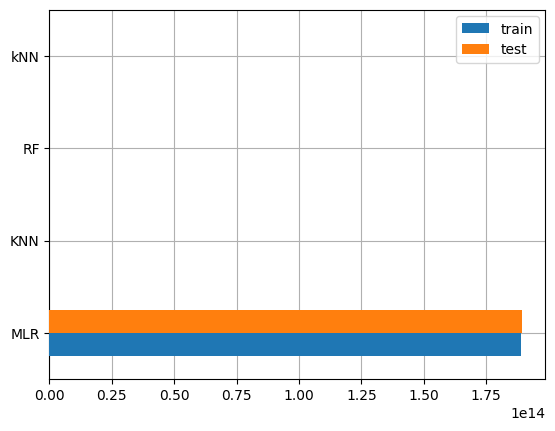

In [623]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax,
zorder=3)
ax.grid(zorder=0)

                        APPLYING TRANSFORMATION IN TEST DATA

            4)Validation: Functions for cross-validation or other model validation techniques.

In [486]:
from sklearn.linear_model import LinearRegression
ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)
y_pred = ml_reg.predict(X_test)

In [487]:
# calculating root squared error
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred)**0.5
print("RMSE: {:,.2f}".format(rmse))

RMSE: 211,911.99


In [488]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print("MAE: {:,.2f}".format(mae))

MAE: 60,446.94


In [489]:
eval_df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred, "residuals": y_test - y_pred})

           Percentage of Predictions within Acceptable error

In [490]:
eval_df["prop_error"] = eval_df["residuals"].abs()/eval_df["y_true"]

In [491]:
#Costum metric: Percentage of Predictions Within Acceptable Error
costum_metric = 100*(eval_df["prop_error"] < 0.15).mean()
print("Costum metric: {:,.1f}%".format(costum_metric))

Costum metric: 78.6%


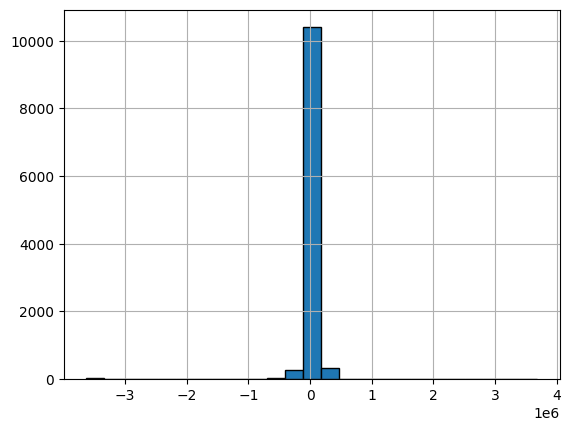

In [492]:
#Distributions of residuals
eval_df["residuals"].hist(bins=25, ec='k');

In [493]:

(eval_df["residuals"] <=0).mean()

0.459529791816224

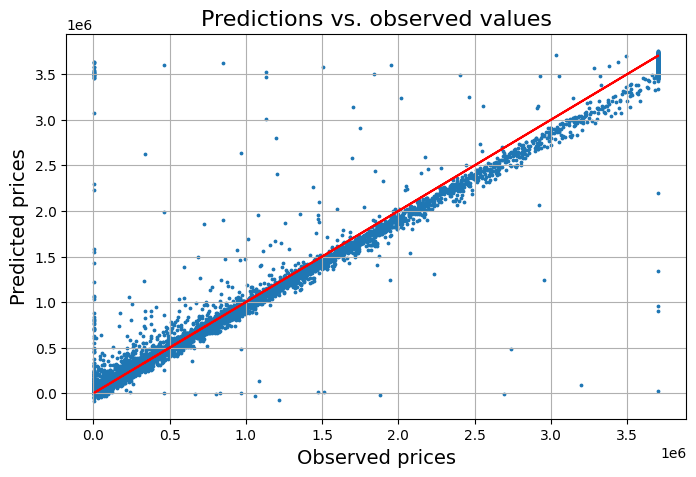

In [494]:
#Observed vs. predicted values plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(eval_df["y_true"], eval_df["y_pred"], s=3)
ax.plot(eval_df["y_true"], eval_df["y_true"], color='red')
ax.set_title('Predictions vs. observed values', fontsize=16)
ax.set_xlabel('Observed prices', fontsize=14)
ax.set_ylabel('Predicted prices', fontsize=14)
ax.grid();

In [495]:

eval_df["y_pred"].loc[eval_df["y_pred"]<0][:5]

38937    -2104.586789
59460   -24330.040332
11860    -5325.246642
7918    -12794.575980
21178    -3675.148493
Name: y_pred, dtype: float64

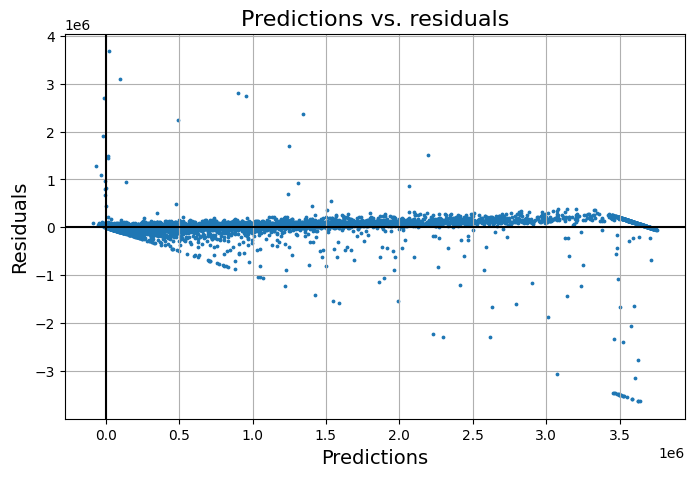

In [496]:
#Predicted values vs. residuals
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(eval_df["y_pred"], eval_df["residuals"], s=3)
ax.set_title('Predictions vs. residuals', fontsize=16)
ax.set_xlabel('Predictions', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
ax.axhline(color='k'); ax.axvline(color='k');
ax.grid();

             K-fold cross validation for model evaluation

In [497]:

from sklearn.linear_model import LinearRegression
ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)
y_pred = ml_reg.predict(X_test)

In [498]:
## Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

## Standardize the numeric features
scaler = StandardScaler()
scaler.fit(X_train)
X_train.loc[:] = scaler.fit_transform(X_train)
X_test.loc[:] = scaler.transform(X_test)
## Model training
ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)

## Get predictions
y_pred = ml_reg.predict(X_test)

## Evaluate the model using the same metric
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print("MAE: {:,.2f}".format(mae))

MAE: 60,952.70


In [499]:
from sklearn.model_selection import cross_validate, RepeatedKFold

## Scaling the whole dataset
scaler = StandardScaler()
scaler.fit(X)
X.loc[:] = scaler.fit_transform(X)

## 10-fold cv
ml_reg = LinearRegression()
cv_results = cross_validate(ml_reg, X, y, scoring='neg_mean_absolute_error', cv=10)
scores = -1*cv_results['test_score']
scores

array([49543.66213759, 57395.69286895, 57693.94033997, 60221.28398375,
       54761.37151746, 61702.83958071, 55468.37248443, 77524.77930003,
       64816.57038191, 76036.51882318])

In [500]:
scores.mean()

61516.503141798195